# Проект: Исследование стартапов
- Автор: Завьялов Иван
- Дата: 18.07.2025

## Цель и задачи  
**Цель:** Подготовить датасет,оценить корректность и достаточность данных для проведения исследования, а также провести исследовательский анализ данных с целью выявления характеристик стартапов, которые могут быть инвестиционно привлекательными для заказчика.   

**Задачи:**
1. Загрузить данные, познакомиться с их содержимым и провести первичную предобработку.
2. Провести предобработку данных и предварительное исследование.
3. Провести исследовательский анализ объединённых данных:
    - объединить данные;
    - проанализировать выбросы в данных;
    - изучить стоимость продажи компаний с ценой в 0 и 1 доллар ;
    - выделить категории по цене стартапов;
    - проанализировать типичное значение количества раундов для каждого возможного статуса стартапа. 
4. Сформулировать итоговые выводы и рекомендации по проведённому анализу.


## Данные

Для анализа используются исторические данные, предоставленные заказчиком исследования. Данные состоят из пяти основных датасетов и двух дополнительных:

- `company_and_rounds.csv` — содержит информацию о компаниях и раундах финансирования;
- `acquisition.csv` — содержит информацию о покупках одними компаниями других компаний;
- `people.csv` — содержит информацию о сотрудниках;
- `education.csv` — содержит информацию об образовании сотрудника;
- `degrees.csv` — содержит информацию о типе образования сотрудника.

Дополнительные датасеты:
- `fund.csv` — содержит информацию о фондах;
- `investment.csv` — содержит информацию о раундах инвестирования.

### Описание датасета `company_and_rounds.csv`

- `company ID` — идентификатор компании;
- `name` — название компании;
- `category code` — категория области деятельности компании;
- `status` — статус компании;
- `founded at` — дата инвестирования;
- `closed at` — дата закрытия компании;
- `domain` — официальный сайт компании;
- `network username` — ник компании в сети;
- `country code` — код страны компании;
- `investment rounds` — число инвестиционных раундов ;
- `funding rounds` — число раундов финансирования ;
- `funding total` — сумма финансирования;
- `milestones` — вехи финансирования ;
- `funding round id` — идентификатор этапа финансирования;
- `company id` —идентификатор компании ;
- `funded at` — дата финансирования;
- `funding round type` — тип финансирования;
- `raised amount` — сумма финансирования;
- `pre money valuation` — предварительная денежная оценка;
- `participants` — число участников;
- `is first round` — является ли раунд первым ;
- `is last round` — является ли раунд последним.


### Описание датасета `acquisition.csv`

- `id` — идентификатор покупки;
- `acquiring_company_id` — идентификатор покупающей компании;
- `acquired_company_id` — идентификатор покупаемой компании;
- `term_code` — варианты расчёта;
- `price_amount` — сумма сделки;
- `acquired_at` — дата сделки.

### Описание датасета `people.csv`

- `id` — идентификатор сотрудника.;
- `first_name` — имя сотрудника;
- `last_name` — фамилия сотрудника;
- `company_id` — идентификатор компании;
- `network_username` — ник в социальных сетях.

### Описание датасета `education.csv`

- `id` — идентификатор записи об образовании;
- `person_id` — идентификатор работника;
- `instituition` — название учебного заведения;
- `graduated_at` — дата получения образования.

### Описание датасета `degrees.csv`

- `id` — идентификатор записи;
- `object_id` — идентификатор сотрудника;
- `degree_type` — тип образования;
- `subject` — специальность.

## Структура проекта

1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных и предварительное исследование.
3. Исследовательский анализ данных.
4. Итоговые выводы и рекомендации.

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Загрузка данных, вывод общей информации и исправление названия столбцов
Начнём с загрузки библиотек и всех датасетов . Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в  переменные.

In [1]:
# Импортируем библиотеки
try:  
    import pandas as pd 
    print("Pandas установлен")   
except ImportError:  
    print("Pandas не установлен") 

# Загружаем библиотеки для визуализации данных
try:  
    import matplotlib.pyplot as plt 
    print("Matplotlib.pyplot установлен")   
except ImportError:  
    print("Matplotlib.pyplot не установлен") 


# Устанавливаем  визуализацию диаграммы Венна
!pip install matplotlib-venn -q
from matplotlib_venn import venn2

Pandas установлен
Matplotlib.pyplot установлен


In [2]:
# Устанавим глобальный формат отображения чисел
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
# Выгружаем данные и сохраняем их в переменные 
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

##### Познакомимся с данными датасета company_and_rounds.csv — выведем первые строки методом head(), проверим и при необходимости исправим названия столбцов, а затем выведем общую информацию о датасете методом info():

In [4]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Проверим названия столбцов
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

Названия столбцов нужно привести к нижнему регистру и стилю snake_case. Но при изменении стиля и регистра названий столбцов в датасете будут 2 столбца с одинаковым названием. Поменяем название первого столбца с 'company ID' на 'company_id1'

In [6]:
# Меняем название столбца
company_and_rounds_df=company_and_rounds_df.rename(columns={'company  ID': 'company_id1'})

In [7]:
# Приведем названия столбцов  к стилю snake_case
company_and_rounds_df.columns=company_and_rounds_df.columns.str.replace('  ','_')

In [8]:
# Проверим изменения
company_and_rounds_df.columns

Index(['company_id1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Названия столбцов приведены к нужному стилю

In [9]:
# Выведем общую информацию о датасете
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id1          217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

Данные представлены 217774 строками и 22 столбцами. В данных присутствует большое количество пропусков. Данные с информацией о датах представлены строковым типом, который нужно поменять на тип даты и времени.

##### Познакомимся с данными датасета acquisition.csv — выведем первые строки методом head(), проверим и при необходимости исправим названия столбцов, а затем выведем общую информацию о датасете методом info():

In [10]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [11]:
# Проверим названия столбцов
acquisition_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

Названия столбцов имеют корректный вид.

In [12]:
# Выведем общую информацию о датасете
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Данные представлены 9407 строками и 6 столбцами.В данных большое количество пропусков только в одном столбце. Столбец с информацией о датах представлен строковым типом, который нужно поменять на тип даты и времени.

##### Познакомимся с данными датасета people.csv — выведем первые строки методом head(), проверим и при необходимости исправим названия столбцов, а затем выведем общую информацию о датасете методом info():

In [13]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,"2,526.00",NaN
4,100000,Sue,Pilsch,NaN,NaN


In [14]:
# Проверим названия столбцов
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Названия столбцов имеют корректный вид.

In [15]:
# Выведем общую информацию о датасете
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Данные представлены 226709 строками и 5 столбцами. В данных много пропусков в 2 столбцах.

##### Познакомимся с данными датасета education.csv  — выведем первые строки методом head(), проверим и при необходимости исправим названия столбцов, а затем выведем общую информацию о датасете методом info():

In [16]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [17]:
# Проверим названия столбцов
education_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

Названия столбцов имеют корректный вид.

In [18]:
# Выведем общую информацию о датасете
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Данные представлены 109610 строками и 4 столбцами. С данных много пропусков в одном столбце.Столбец с датой представлен строковым типом и его нужно привести к типу даты.

##### Познакомимся с данными датасета degrees.csv  — выведем первые строки методом head(), проверим и при необходимости исправим названия столбцов, а затем выведем общую информацию о датасете методом info():

In [19]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [20]:
# Проверим названия столбцов
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Названия столбцов имеют корректный вид.

In [21]:
# Выведем общую информацию о датасете
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Данные представлены 109610 строками и 4 столбцами. В данных есть пропуски в 2 столбцах.

##### Познакомимся с данными дополнительных датасетов fund.csv и investment.csv  — выведем первые строки методом head() и общую информацию о датасетах методом info():

In [22]:
# Выводим первые строки датафрейма fund.csv на экран
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [23]:
# Выведем общую информацию о датасете
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [24]:
# Выводим первые строки датафрейма investment.csv на экран
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [25]:
# Выведем общую информацию о датасете
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


##### На  этапе знакомства с данными были загружены 7 датасетов: 5 основных для исследования и 2 дополнительных. В датасете company_and_rounds.csv обнаружено большое количество пропусков в нескольких столбцах. Также в этом датасете есть два столбца с одинаковыми названиями, поэтому первый переименовали так, чтобы различать их между собой при дальнейшей предобработке и исследовании.

### 1.2. Смена типов и анализ пропусков

##### Обработаем типы данных в столбцах, которые хранят значения даты и времени

In [26]:
# В датасете company_and_rounds.csv 3 столбца с датой представлены типом данных object. Поменяем тип данных на дату и время.
for column in ['founded_at','closed_at','funded_at']:
    company_and_rounds_df[column]=pd.to_datetime(company_and_rounds_df[column])

In [27]:
# Выведем информацию о датасете
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id1          217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [28]:
# В датасете acquisition.csv столбец с датой представлен типом данных object. Поменяем тип данных на дату и время.
acquisition_df['acquired_at']=acquisition_df['acquired_at'].astype('datetime64[ns]')

In [29]:
# Выведем информацию о датасете
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [30]:
# В датасете education.csv  столбец с датой представлен типом данных object. Поменяем тип данных на дату и время.
education_df['graduated_at']=education_df['graduated_at'].astype('datetime64[ns]')

In [31]:
# Выведем информацию о датасете
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


##### Во всех датасетах данные, содержащие информацию о дате, приведены к нужному типу.

##### Теперь оценим полноту данных. Для каждого датасета выведем абсолютное и относительное значение пропусков в данных.

In [32]:
# Выведем абсолютное число пропусков в столбцах датасета company_and_rounds.csv
company_and_rounds_df.isna().sum().sort_values(ascending=False)

closed_at              214325
funded_at              165094
is_last_round          164846
is_first_round         164846
participants           164846
pre_money_valuation    164846
raised_amount          164846
funding_round_type     164846
funding_round_id       164846
company_id             164846
network_username       122240
country_code           109167
founded_at             107818
category_code           73888
domain                  70615
company_id1               302
milestones                302
name                      302
funding_rounds            302
investment_rounds         302
status                    302
funding_total             302
dtype: int64

Во всех столбцах присутствуют пропуски

In [33]:
# Посчитаем долю пропусков в процентах по отношению ко всем данным
company_and_rounds_df.isna().sum().sort_values(ascending=False)/company_and_rounds_df.shape[0]*100

closed_at             98.42
funded_at             75.81
is_last_round         75.70
is_first_round        75.70
participants          75.70
pre_money_valuation   75.70
raised_amount         75.70
funding_round_type    75.70
funding_round_id      75.70
company_id            75.70
network_username      56.13
country_code          50.13
founded_at            49.51
category_code         33.93
domain                32.43
company_id1            0.14
milestones             0.14
name                   0.14
funding_rounds         0.14
investment_rounds      0.14
status                 0.14
funding_total          0.14
dtype: float64

Больше всего пропусков в столбце с датой закрытия компании и составляет почти 98,5%. В 9 столобцах доля пропусков составляет около 75,5 %. Данные очень плохого качества, что усложнит дальнейший анализ.

In [34]:
# Выведем абсолютное число пропусков в столбцах датасета acquisition.csv
acquisition_df.isna().sum().sort_values(ascending=False)

term_code               7576
acquired_at               29
id                         0
acquiring_company_id       0
acquired_company_id        0
price_amount               0
dtype: int64

Пропуски есть в 2 столбцах

In [35]:
# Посчитаем долю пропусков в процентах по отношению ко всем данным
acquisition_df.isna().sum().sort_values(ascending=False)/acquisition_df.shape[0]*100

term_code              80.54
acquired_at             0.31
id                      0.00
acquiring_company_id    0.00
acquired_company_id     0.00
price_amount            0.00
dtype: float64

Самое большое количество пропусков в столбце с вариантами рассчета и составляет 80,5%. В столбце с датой сделки 0,3% пропусков.

In [36]:
# Выведем абсолютное число пропусков в столбцах датасета people.csv
people_df.isna().sum().sort_values(ascending=False)

company_id          192094
network_username    187842
first_name               5
last_name                1
id                       0
dtype: int64

Большое количество пропусков в 2 столбцах

In [37]:
# Посчитаем долю пропусков в процентах по отношению ко всем данным
people_df.isna().sum().sort_values(ascending=False)/people_df.shape[0]*100

company_id         84.73
network_username   82.86
first_name          0.00
last_name           0.00
id                  0.00
dtype: float64

В столбцах с идентификатором компании и ником в социальных сетях 84,7% и 82,8% пропусков соответственно

In [38]:
# Выведем абсолютное число пропусков в столбцах датасета education.csv
education_df.isna().sum().sort_values(ascending=False)

graduated_at    51556
instituition       55
id                  0
person_id           0
dtype: int64

Пропуски есть в 2 столбцах.

In [39]:
# Посчитаем долю пропусков в процентах по отношению ко всем данным
education_df.isna().sum().sort_values(ascending=False)/education_df.shape[0]*100

graduated_at   47.04
instituition    0.05
id              0.00
person_id       0.00
dtype: float64

В столбце с датой получения образования 47% пропусков, в столбце с названием учебного заведения 0,05% пропусков.

In [40]:
# Выведем абсолютное число пропусков в столбцах датасета degrees.csv
degrees_df.isna().sum().sort_values(ascending=False)

subject        28312
degree_type    11218
id                 0
object_id          0
dtype: int64

Пропуски есть в 2 столбцах

In [41]:
# Посчитаем долю пропусков в процентах по отношению ко всем данным
degrees_df.isna().sum().sort_values(ascending=False)/degrees_df.shape[0]*100

subject       25.83
degree_type   10.23
id             0.00
object_id      0.00
dtype: float64

В столбце со специальностью 25,8% пропусков. В столбце с типом образования 10,2% пропусков.

### 1.3.  Выводы после знакомства с данными и первичной предобработки

  На первом этапе проекта были загружены 7 датасетов: 5 основных для исследования и 2 дополнительных. В датасете company_and_rounds.csv обнаружено большое количество пропусков в нескольких столбцах. Расположение пропусков в данных и их характер позволяет предположить, что этот датасет создан объединением двух таблиц с помощью Left соединения, при котором строки без соответствия из второй таблицы были автоматически заполнены пропусками. В результате исследование по раундам финансирования будет основываться на ограниченных данных из второй таблицы. В таблицах с информацией о сотрудниках много пропусков с данными о компаниях, в которых работает сотрудник, и исследование также будет проводиться на ограниченных данных. Также для исследования столбцы с датой были приведены к нужному типу для удобства оценки динамики по годам.

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам

##### Используем датасет company_and_rounds.csv. Выделим год из столбца с датой финансирования и на основании столбца raised_amount с помощью сводной таблицы выведем типичный размер средств, выделяемых в рамках одного раунда финансирования и общее количество раундов финансирования

In [42]:
# Выделим год из столбца с датой финансирования
company_and_rounds_df['year']=company_and_rounds_df['funded_at'].dt.year

In [43]:
# Создаём сводную таблицу
pivot_table=pd.pivot_table (company_and_rounds_df,
                                               index='year',
                                               values='raised_amount',
                                               aggfunc=['median','count'])
display(pivot_table)

,median,count
,raised_amount,raised_amount
year,,
"1,960.00",0.00,9
"1,973.00",0.00,1
"1,974.00",0.00,2
"1,984.00","41,000.00",3
"1,985.00",0.00,1
"1,987.00","1,250,000.00",2
"1,989.00","15,000.00",1
"1,990.00","1,000,000.00",1


In [44]:
# Фильтруем таблицу  по годам, в которых было более 50 раундов финансирования
filt_pivot_table=pivot_table[pivot_table[( 'count', 'raised_amount')]>50]

In [45]:
# Выведем таблицу на экран
display(filt_pivot_table)

,median,count
,raised_amount,raised_amount
year,,
"1,999.00","2,000,000.00",76
"2,000.00","4,200,000.00",125
"2,001.00","3,000,000.00",96
"2,002.00","4,200,000.00",116
"2,003.00","3,000,000.00",159
"2,004.00","5,000,000.00",291
"2,005.00","5,500,000.00",1633
"2,006.00","5,000,000.00",2436


In [46]:
# Вычислим скользящую среднюю методом rolling()
import warnings
warnings.filterwarnings('ignore')

filt_pivot_table['mean'] = filt_pivot_table[('median','raised_amount')].rolling(window=2).mean()


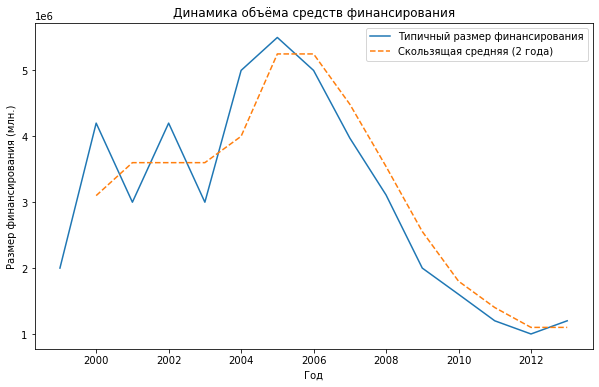

In [47]:
# Построим график для отображения динамики типичного размера средств финансирования по годам
plt.figure(figsize=(10, 6))

plt.plot(filt_pivot_table[('median','raised_amount')], label='Типичный размер финансирования')
plt.plot(filt_pivot_table['mean'], label='Скользящая средняя (2 года)', linestyle='--')
plt.ylabel('Размер финансирования (млн.)')
plt.xlabel('Год')
plt.legend()
plt.title('Динамика объёма средств финансирования')
plt.show(block=False)

##### В 2005 году типичный размер собранных в рамках одного раунда средств был максимальным. В 2013 году впервые, начиная с 2005 года, наблюдалось увеличение размера финансирования. Также увеличилось число раундов финансирования.

### 2.2. Люди и их образование

##### Объединим датасеты people.csv и education.csv, выделим категории компаний по числу сотрудников и оценим долю сотрудников без информации об образовании

In [48]:
# Объединяем датасеты с помощью Left присоединения, чтобы не потерять информацию о сотрудниках.
full_df=people_df.merge(education_df,left_on='id',right_on='person_id',how='left',suffixes = ('_people','_education'))

In [49]:
display(full_df.head())

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [50]:
# Посчитаем общее число сотрудников в компаниях и сохраним результаты 
grouped_df=full_df.groupby('company_id')['id_people'].count().reset_index()

In [51]:
display(grouped_df.head())

,company_id,id_people
0,1.00,3
1,2.00,1
2,3.00,5
3,4.00,18
4,5.00,84


In [52]:
# Переименуем столбец 'id_x' на 'total_people_count'
grouped_df=grouped_df.rename(columns={'id_people':'total_people_count'})

In [53]:
# Объединим таблицу с общим числом сотрудников и основной датасет
main_df=full_df.merge(grouped_df,on='company_id',how='left')

In [54]:
# Выведем получившийся датасет на экран
display(main_df.head())

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,total_people_count
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,84.00
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,14.00
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,3.00
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,2.00
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN


##### Вычислим количество уникальных значений с числом сотрудников для определения количества категорий, на которые будем делить компании.

In [55]:
main_df['total_people_count'].value_counts()

1.00      14150
2.00       9470
3.00       5571
4.00       3324
5.00       2235
6.00       1554
7.00       1127
8.00        920
9.00        774
11.00       572
10.00       510
376.00      376
13.00       338
12.00       300
18.00       288
221.00      221
15.00       210
192.00      192
16.00       192
19.00       190
20.00       180
14.00       168
17.00       136
111.00      111
25.00       100
89.00        89
44.00        88
84.00        84
27.00        81
80.00        80
39.00        78
73.00        73
71.00        71
70.00        70
35.00        70
34.00        68
22.00        66
66.00        66
64.00        64
30.00        60
59.00        59
29.00        58
52.00        52
26.00        52
24.00        48
46.00        46
43.00        43
42.00        42
28.00        28
23.00        23
21.00        21
Name: total_people_count, dtype: int64

В данных большое число компаний с 1,2 и 3 сотрудниками. Их можно выделить в отдельные категории. А оставшиеся разделить ещё на 4 категории.

##### Теперь разделим компании на 7 категорий по числу сотрудников и посчитаем долю сотрудников без информации об образовании. 

In [56]:
# Выделяем категории предприятий
main_df['category']=pd.cut(main_df['total_people_count'], bins=[0, 1, 2, 3, 5, 10, 25, float('inf')],labels=['1', '2', '3', '4-5', '6-10', '11-25', '26+'])

In [57]:
# Выведем информацию о датасете на экран
display(main_df.head())

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,total_people_count,category
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,84.00,26+
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,14.00,11-25
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,3.00,3
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,2.00,2
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


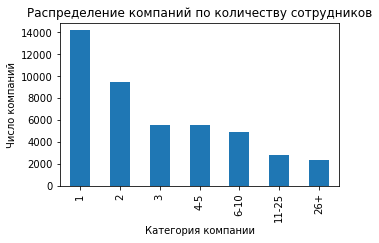

In [58]:
# Отобразим на столбчатой диаграмме число предприятий по числу сотрудников
plt.figure(figsize=(5, 3))
main_df.groupby('category')['company_id'].count().sort_values(ascending=False).plot(kind='bar',
                                                                                    x='category',
                                                                                    title='Распределение компаний по количеству сотрудников',
                                                                                    ylabel='Число компаний',
                                                                                    xlabel='Категория компании')
plt.show()

##### Теперь оценим долю сотрудников без информации об образовании в каждой из групп

In [59]:
# Отфильтруем датасет по сотрудникам, у которых нет информации об образовании
main1_df=main_df[main_df['id_education'].isna()]
display(main1_df.head())

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,total_people_count,category
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,14.00,11-25
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,3.00,3
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,2.00,2
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [60]:
# Сгруппируем данные по категориям предприятий и посчитаем общее число сотрудников без информации об образовании
main1_group_df=main1_df.groupby('category')['id_people'].count()
display(main1_group_df)

category
1        8381
2        2146
3        1267
4-5      1540
6-10     1541
11-25     835
26+       441
Name: id_people, dtype: int64

In [61]:
# Теперь посчитаем общее число сотрудников в каждой категории предприятий
main2_group_df=main_df.groupby('category')['id_people'].count()
display(main2_group_df)

category
1        14150
2         9470
3         5571
4-5       5559
6-10      4885
11-25     2832
26+       2322
Name: id_people, dtype: int64

In [62]:
# Теперь рассчитаем долю сотрудников без информации об образовании и выведем на экран
display(main1_group_df/main2_group_df)

category
1       0.59
2       0.23
3       0.23
4-5     0.28
6-10    0.32
11-25   0.29
26+     0.19
Name: id_people, dtype: float64

##### 
- Компании были разделены на 7 группы по числу сотрудников. Самое большое число компаний  с 1 сотрудником. В почти 60% нет информации об образовании сотрудника. В остальных категориях доли сотрудников без информации об образовании колеблется от 19% до 31,5%.
- К датасетам people.csv и education.csv можно присоединить датасет degrees.csv по столбцу 'object_id', если убрать в нём строку 'p:' перед идентификатором сотрудника 

### 2.3. Объединять или не объединять — вот в чём вопрос

##### Выясним, подходит ли столбец network_username для объединения данных в датасетах company_and_rounds.csv и people.csv . Для этого проверим дублируется ли в датасетах информация в этих столбцах и насколько часто.

In [63]:
# Приведём в датасетах все строки в этих столбцах к нижнему регистру, чтобы потом удалить явные и неявные дубликаты
company_and_rounds_df['network_username']=company_and_rounds_df['network_username'].str.lower()
people_df['network_username']=people_df['network_username'].str.lower()

In [64]:
# Сохраним в переменную общее число уникальных значений по столбцу в двух датасетах
cr_unique=company_and_rounds_df['network_username'].nunique()
p_unique=people_df['network_username'].nunique()
total_unique=cr_unique+p_unique
display(total_unique)

117758

In [65]:
# Удалим дубликаты в этих столбцах во всех датасетах 
company_and_rounds_nodup_df=company_and_rounds_df.drop_duplicates(subset='network_username')
people_nodup_df=people_df.drop_duplicates(subset='network_username')



In [66]:
# Объединим датасеты без дубликатов методом 'outer' по столбцу network_username
merged_df=company_and_rounds_nodup_df.merge(people_nodup_df,on='network_username',how='outer')

In [67]:
# Выведем новый датасет на экран
display(merged_df.head())

,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year,id,first_name,last_name,company_id_y
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,...,"5,250,000.00",0.00,2.00,0.00,1.00,"2,005.00",NaN,NaN,NaN,NaN
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,10.00,Mark,Zuckerberg,5.00
2,"100,042.00",HostNine,NaN,operating,NaT,NaT,hostnine.com,hostnine,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"100,062.00",Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"100,068.00",ChatRandom,games_video,operating,2011-02-01,NaT,chatrandom.com,chatrandom,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Проверим дубликаты и выведем их число на экран
display(merged_df.duplicated().sum())

0

##### После объединения двух датасетов число дубликатов 0, соответственно информация в столбцах network_username не дублируется для этих датасетов.

In [69]:
# Выведем информацию по датасету
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115256 entries, 0 to 115255
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id1          79375 non-null   float64       
 1   name                 79375 non-null   object        
 2   category_code        76411 non-null   object        
 3   status               79375 non-null   object        
 4   founded_at           63558 non-null   datetime64[ns]
 5   closed_at            1075 non-null    datetime64[ns]
 6   domain               78884 non-null   object        
 7   network_username     115255 non-null  object        
 8   country_code         54222 non-null   object        
 9   investment_rounds    79375 non-null   float64       
 10  funding_rounds       79375 non-null   float64       
 11  funding_total        79375 non-null   float64       
 12  milestones           79375 non-null   float64       
 13  funding_round_

Теперь найдём общее количество пересечений по столбцу network_username между двумя датасетами. Для этого вычтем из переменной, содержащей общее число уникальных значений по двум датасетам число строк в объединённом датасете

In [70]:
print("Количество пересечений:", total_unique-merged_df.shape[0] )

Количество пересечений: 2502


##### Добавим визуализацию для наглядного отображения пересечений между датасетами


In [71]:
# # Извлекаем уникальные network_username из каждой таблицы
people_users = set(people_df['network_username'].dropna().unique())
company_users = set(company_and_rounds_df['network_username'].dropna().unique())

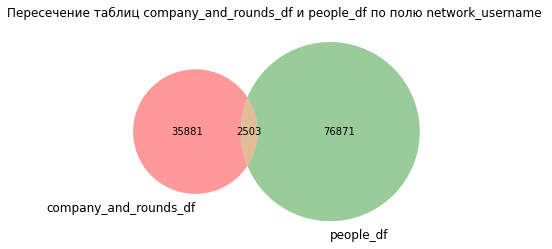

In [120]:
# Строим диаграмму Венна
venn2([people_users, company_users],  set_labels=('company_and_rounds_df', 'people_df'))

# Отображаем график
plt.title("Пересечение таблиц company_and_rounds_df и people_df по полю network_username ")
plt.show()  

##### Общее количество пересечений по столбцу  network_username  равно 2503, что составляет очень малую долю от каждого из датасетов. Поэтому этот столбец нельзя использовать для объединения данных в датасетах.

### 2.4. Проблемный датасет и причина возникновения пропусков

In [73]:
# Выведем информацию о датасете company_and_rounds.csv на экран и ещё раз изучим данные
display(company_and_rounds_df.head())
display(company_and_rounds_df.info())


,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,...,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00,"2,005.00"
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,...,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00,"2,007.00"
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,...,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00,"2,008.00"
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id1          217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

##### В датасете company_and_rounds.csv обнаружено большое количество пропусков в нескольких столбцах. Расположение пропусков в данных и их характер позволяет предположить, что этот датасет создан объединением двух таблиц с помощью Left соединения, при котором строки без соответствия из второй таблицы были автоматически заполнены пропусками. По гипотезе заказчика данные раньше хранились в другом виде. Возможно они хранились в двух разных таблицах: с информацией о компаниях и информацией о раундах финансирования. В первой таблице было 217472 строки и 13 столбцов. Во второй после присоединения стало 52928 строк и 10 столбцов. Для подготовки данных для удобства дальнейшего исследования можно разделить таблицы на 2 и очистить дубликаты по столбцам 'company_id'.

In [74]:
# Разделим датасет на два отдельных с информацией о компаниях и раундах финансирования
# Датасет с информацией о компаниях
company_df = company_and_rounds_df[[
    'company_id1', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
    'domain', 'network_username', 'country_code', 'investment_rounds',
    'funding_rounds', 'funding_total', 'milestones'
]].reset_index(drop=True)

In [75]:
# Выведем новый датасет на экран
company_df.head() 

,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,3.00,"39,750,000.00",5.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,3.00,"39,750,000.00",5.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,3.00,"39,750,000.00",5.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00


In [76]:
# Переименуем столбец 'company_id1' на 'company_id'
company_df=company_df.rename(columns={'company_id1': 'company_id'})

In [77]:
# Выведем названия столбцов на экран
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'],
      dtype='object')

In [78]:
# Датасет с раундами финансирования
rounds_df = company_and_rounds_df[[
    'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round',
    'is_last_round'
]].reset_index(drop=True)

In [79]:
# Выведем новый датасет на экран
rounds_df.head() 

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Проверим наличие полных дубликатов в каждой таблице
display(company_df.duplicated().sum())
display(rounds_df.duplicated().sum())

21220

164845

In [81]:
# Удалим полные дубликаты из таблиц
company_df = company_df.drop_duplicates()
rounds_df = rounds_df.drop_duplicates()

In [82]:
# Проверим дубликаты по столбцу 'company_id' в таблице company_df
display(company_df.duplicated(subset=['company_id']).sum())


0

В таблице company_df дубликатов по столбцу 'company_id' нет

In [83]:
# Удалим строки с пропусками в столбце 'company_id' таблицы rounds_df, возникшие в результате объединения
rounds_df=rounds_df.dropna(subset=['company_id'])

In [84]:
# Выведем информацию о датасете
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB


Таблица очищена от пропусков и дубликатов

In [85]:
# Выведем информацию о таблице company_df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [86]:
# Удалим  пропуски в столбце 'company_id'
company_df=company_df.dropna(subset=['company_id'])

In [87]:
# Выведем информацию о таблице company_df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


Таблицы проверена на дубликаты и очищена от пропусков.

#####  Данные подготовлены так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

### 2.5. Выводы после предобработки данных и предварительного исследования

- В 2005 году типичный размер собранных в рамках одного раунда средств был максимальным. В 2013 году впервые, начиная с 2005 года, наблюдалось увеличение размера финансирования. Также увеличилось число раундов финансирования. Общее число раундов финансирования постоянно увеличивается из года в год, что показывает активное развитие этой сферы.

- Основное число компаний имеют до 15 человек сотрудников и доля сотрудников без информации об образовании составляет почти 40%,в двух других категориях число компаний невелико и доля сотрудников без информации об образовании около 20%.

- Информация в столбцах network_username не дублируется для разных датасетов.Общее количество пересечений по столбцу network_username между двумя датасетами равно 2502, что составляет очень малую долю от каждого из них. Поэтому этот столбец нельзя использовать для объединения данных в датасетах.

- Датасет company_and_rounds_df был разделен на 2 таблицы, из которых предположительно был создан. Полученные таблицы были очищены от дубликатов и пропусков. В результате данные подготовлены так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.


## Шаг 3. Исследовательский анализ объединённых таблиц

### 3.1. Объединение данных

##### Объединим данные для ответа на вопросы заказчика.  В качестве основы для объединённой таблицы возьмём данные из обработанного датасета company_and_rounds.csv — таблицы company_df и выберем только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired.

In [88]:
filt_company_df=company_df[(((company_df['funding_rounds'].notna()) & (company_df['funding_rounds']>0))  | (company_df['investment_rounds']>0)) | (company_df['status']=='acquired')]

In [89]:
# Выведем отфильтрованный датасет на экран и проверим значения
filt_company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.00,3.00,"39,750,000.00",5.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
15,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00
20,"10,014.00",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00


In [90]:
# Выведем информацию о датасете
filt_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

#####  Отфильтрованный датасет содержит 40747 строк и 13 столбцов. Дальнейший анализ будем проводить на этих данных.

### 3.2. Анализ выбросов

##### Определим типичный размер средств, предоставляемый компаниям за рассматриваемый период. Построим гистограмму распределения данных по столбцу funding_total

In [91]:
# Выведем статистическую информацию о столбце funding_total  методом describe()
filt_company_df['funding_total'].describe()

count          40,747.00
mean       10,135,609.64
std        56,464,359.98
min                 0.00
25%                 0.00
50%           600,000.00
75%         5,650,650.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

##### В столбце очень много больших выбросов,большое стандартное отклонение, которое сильно превышает большинство данных в столбце, а также сильное различие между медианой и средним. На таких данных не получится построить наглядный график распределения данных и выбросов. Для примера построим диаграмму размаха на исходных данных.

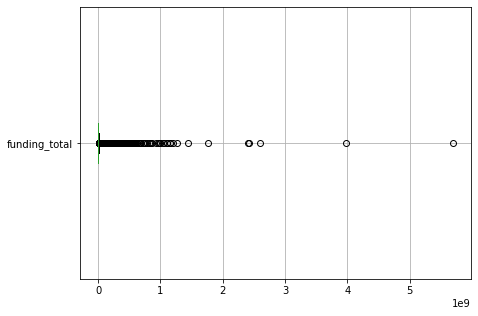

In [92]:
# Построим диаграмму размаха
boxplot=filt_company_df.boxplot(column='funding_total',
                                vert=False,
                                figsize=(7,5))

##### По диаграмме видно много одиночных больших выбросов, которые выбиваются из типичных значений. Медиана смещена к 0 и по ней сложно что-то определить .  Для нахождения типичных значений отфильтруем столбец по 75% процентилю данных , затем построим диаграмму размаха и гистограмму распределения.

In [93]:
df=filt_company_df[filt_company_df['funding_total']<=filt_company_df['funding_total'].quantile(0.75)]

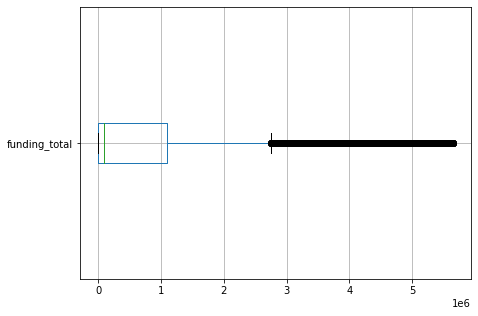

In [94]:
boxplot=df.boxplot(column='funding_total',
                                vert=False,
                                figsize=(7,5))

<AxesSubplot:>

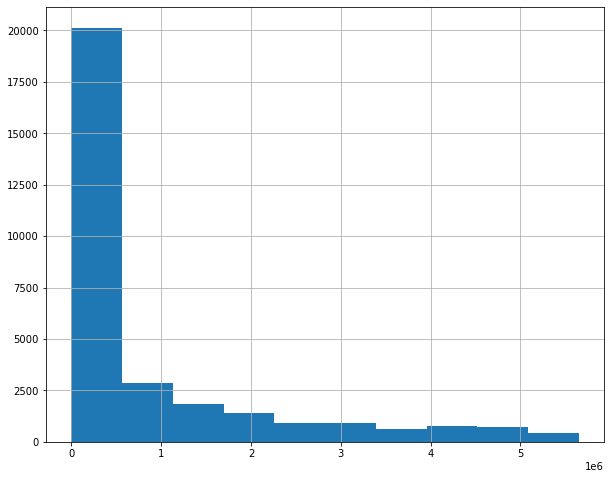

In [95]:
# Строим гистограмму
df['funding_total'].hist(figsize=(10,8),bins=10)

#####  Как видно из гистограммы-типичный размер средств, предоставляемый компаниям, находится в диапазоне от 0 до примерно 5 млн 700 тыс. Самые распространённые суммы финансирования находятся в диапазоне от 0 до 600 тыс. Размеры финансирования с  суммой свыше 6 млн будут выбивающимися.

### 3.3. Куплены забесплатно?

##### Отфильтруем исходный датасет и исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

In [96]:
# Объединим два датасета в один
merged1_df=company_df.merge(acquisition_df,left_on='company_id',right_on='acquired_company_id',how='right')


In [97]:
# Отфильтруем получившийся датасет по условию исследования
merged2_df=merged1_df[((merged1_df['price_amount']==0) | (merged1_df['price_amount']==1)) & (merged1_df['funding_total']>0)]

In [98]:
# Выведем информацию по датасету на экран
merged2_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
7,314.00,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0.00,1.00,"100,000.00",3.00,14,318,314,cash,0,2006-10-01
49,698.00,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0.00,1.00,"1,000,000.00",2.00,65,146,698,cash,0,2007-08-01
51,718.00,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0.00,1.00,"4,000,000.00",0.00,67,156,718,cash,0,2007-08-01
65,175.00,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0.00,1.00,"1,250,000.00",0.00,87,1035,175,cash,0,2007-10-01
85,"1,582.00",BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0.00,1.00,"7,000,000.00",3.00,115,396,1582,cash,0,2007-12-01


In [99]:
# Выведем статистическую информацию по столбцу 'funding_total' методом describe()
merged2_df['funding_total'].describe()

count           1,618.00
mean       18,152,961.94
std       144,503,027.47
min             3,750.00
25%         2,000,000.00
50%         6,000,000.00
75%        15,500,000.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

##### В данных много выбросов, поэтому сильно различаются среднее и медиана. Также очень высокое стандартное отклонение.


##### Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и найдём, каким процентилям границы соответствуют.

In [100]:
# Сперва рассчитаем квартили Q1 и Q3, соответствующие 25% и 75% процентилям
q1=merged2_df['funding_total'].quantile(0.25)
q3=merged2_df['funding_total'].quantile(0.75)
print(q1,q3)

2000000.0 15500000.0


In [101]:
# Рассчитаем межквартильный размах, как разницу между q3 и q1
iqr=q3-q1
print(iqr)

13500000.0


In [102]:
# Вычислим нижний и верхний пороги для выбросов
low_border=q1-1.5*iqr
high_border=q3+1.5*iqr
print("Нижний порог выбросов:", low_border)
print("Верхний порог выбросов:", high_border)

Нижний порог выбросов: -18250000.0
Верхний порог выбросов: 35750000.0


##### Рассчитанная аналитически нижняя граница выбросов получилась отрицательная, так как из-за большого стандартного отклонения получился большой межквартильный размах. Эта граница будет соответствовать 0 процентилю.

##### Теперь проверим какому процентилю соответствует верхний порог выбросов

In [103]:
merged2_df['funding_total'].quantile(0.8)

20000000.0

In [104]:
merged2_df['funding_total'].quantile(0.9)

33015809.999999996

In [105]:
merged2_df['funding_total'].quantile(0.91)

35894000.00000001

##### Верхний порог выбросов, рассчитанный аналитически, соответствует примерно 91% процентилю.

### 3.4. Цены стартапов по категориям

##### Найдём категории стартапов  с типично высокими ценами покупки  и значительным разбросом цен, так как они могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. 

In [106]:
# Выведем все категории стартапов на экран
merged1_df['category_code'].unique()

array(['games_video', 'mobile', 'music', 'web', 'finance',
       'network_hosting', 'enterprise', 'photo_video', 'public_relations',
       'ecommerce', 'advertising', 'software', nan, 'other', 'search',
       'security', 'consulting', 'hardware', 'social', 'cleantech',
       'semiconductor', 'biotech', 'sports', 'legal', 'news', 'health',
       'messaging', 'education', 'analytics', 'automotive', 'hospitality',
       'manufacturing', 'travel', 'medical', 'fashion', 'real_estate',
       'design', 'transportation', 'nonprofit', 'local', 'nanotech'],
      dtype=object)

In [107]:
# Посчитаем число категорий стартапов
merged1_df['category_code'].nunique()

40

In [108]:
# Сгруппируем данные по категориям и посчитаем типичные цены покупки по столбцу price_amount
price_category_df=merged1_df.groupby('category_code')['price_amount'].median()

In [109]:
# Отсортируем категории по медиане и выделим Топ-7
top_price_category_df=price_category_df.sort_values(ascending=False).head(7)

In [110]:
# Выведем Топ-7 категорий на экран
display(top_price_category_df)

category_code
nanotech        584,000,000.00
manufacturing    72,000,000.00
real_estate      50,000,000.00
automotive       43,000,000.00
biotech          13,200,000.00
hospitality      12,500,000.00
finance             600,000.00
Name: price_amount, dtype: float64

##### Самая высокая типичная цена покупки стартапов в категории nanotech. Также выскокие цены в категориях manufacturing,real_estate и automotive. Теперь найдём категории со значительным разбросом цен покупки и сравним с Топ-7 по типичной цене. Так мы найдём самые привлекательные категории для инвесторов.

In [111]:
# Сгруппируем данные по категориям и посчитаем стандартные отклонения цены покупки по столбцу price_amount
std_category_df=merged1_df.groupby('category_code')['price_amount'].std()

In [112]:
# Отсортируем категории по величине стандартного отклонения цены покупки и выделим Топ-7
top_std_category_df=std_category_df.sort_values(ascending=False).head(7)

In [113]:
# Выведем Топ-7 категорий на экран
display(top_std_category_df)

category_code
enterprise         128,088,235,060.17
public_relations     4,059,244,205.05
real_estate          2,505,122,913.06
automotive           2,297,757,559.01
biotech              1,540,373,521.41
health               1,249,084,287.10
other                1,085,128,941.40
Name: price_amount, dtype: float64

##### Самая большая величина разброса цен в категории enterprise. Также выделяются категории public_relations, real_estate и automotive. В остальных категориях различия небольшие.

##### Для крупных инвесторов привлекательны стартапы, которые имеют и высокую типичную цену покупки, и высокую величину разброса цен. Среди выделенных категорий стартапы, которые входят в оба топа, представлены категориями real_estate ,automotive и biotech. Выбраны Топ-7 категорий, так как в остальных категориях невысокая типичная цена покупки и небольшая величина разброса цен, по сравнению с Топ-7.

### 3.5. Сколько раундов продержится стартап перед покупкой

##### Исследуем значение столбца funding_rounds. Затем сгруппируем данные по статусам стартапов и на графике отобразим среднее число раундов финансирования, которое проходило для стартапов каждого статуса.

In [114]:
# Выведем значения столбца funding_rounds и изучим их
filt_company_df['funding_rounds'].unique()

array([ 3.,  0.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11.,
       15., 14., 12.])

##### Общее число раундов финансирвания варьируется от 0 до 15

In [115]:
# Выведем основную статистическую информацию по столбцу funding_rounds
filt_company_df['funding_rounds'].describe()

count   40,747.00
mean         1.29
std          1.26
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         15.00
Name: funding_rounds, dtype: float64

##### Среднее значение числа раундов состаляет 1.29, а медиана 1.

In [116]:
# Выведем на экран виды статусов стартапов
filt_company_df['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

#####  Сгруппируем данные по статусу стартапов и посчитаем медиану раундов финансирования для каждого из них

In [117]:
# Группируем данные
status_group_df=filt_company_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

In [118]:
# Выведем таблицу на экран
display(status_group_df)

status
ipo         1.93
operating   1.52
closed      1.38
acquired    0.52
Name: funding_rounds, dtype: float64

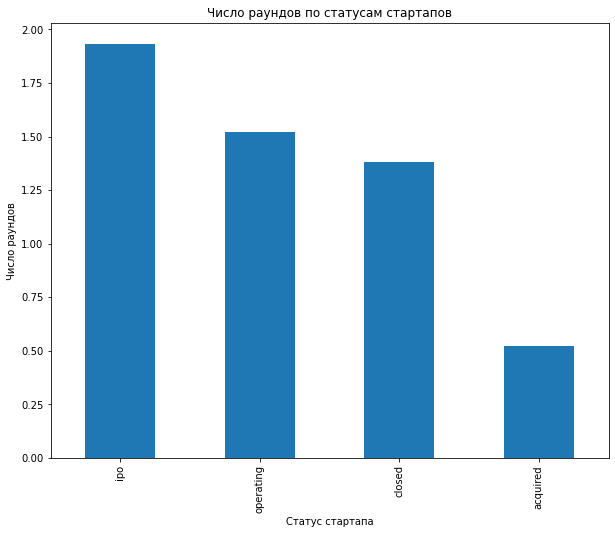

In [119]:
# Построим столбчатую диаграмму
plt.figure(figsize=(10,8))
status_group_df.plot(kind='bar',
                     title='Число раундов по статусам стартапов',
                     xlabel='Статус стартапа',
                     ylabel='Число раундов')
plt.show(block=False)

##### Компании со статусом IPO проходят в среднем больше всего раундов финансирования, а компании со статусом acquired меньше всего раундов. Следовательно успешные стартапы проходят большее число раундов финансирования до IPO, а комапнии со статусом acquired часто быстро продаются.

### 3.6. Выводы

- В данных с общей суммой финансирования присутствовало много больших выбросов. Для определения типичного размера финансирования данные были отфильтрованы по 75 процентилю. Типичный размер средств, предоставляемый компаниям, находится в диапазоне от 0 до примерно 5 млн 700 тыс. Самые распространённые суммы финансирования находятся в диапазоне от 0 до 600 тыс. Размеры финансирования с суммой свыше 6 млн будут выбивающимися из общей массы значений.

- Было проведено исследование столбца funding_total. В столбце присутствовало большой количество выбросов. Из-за высокого стандартного отклонения рассчитанная аналитически нижняя граница выбросов получилась отрицательная, так как получился большой межквартильный размах. Эта граница соответствовала 0 процентилю. Верхний порог выбросов, рассчитанный аналитически, соответствовал примерно 91% процентилю.

- Для крупных инвесторов привлекательны стартапы, которые имеют и высокую типичную цену покупки, и высокую величину разброса цен. Среди выделенных категорий стартапы, которые входят в оба топа, представлены категориями real_estate ,automotive и biotech. Выбраны Топ-7 категорий, так как в остальных категориях невысокая типичная цена покупки и небольшая величина разброса цен, по сравнению с Топ-7.

- Компании со статусом IPO проходят в среднем больше всего раундов финансирования, а компании со статусом acquired меньше всего раундов. Следовательно успешные стартапы проходят большее число раундов финансирования до IPO, а компании со статусом acquired часто быстро продаются.

## Шаг 4. Итоговый вывод и рекомендации

1. В ходе исследования были проанализированы исторические  данные по старптапам, их статусам и раундам финасирования, с целью оценки качества данных и выявления самых привлекательных стартапов для инвестиций. Для этого на первом этапе проекта были загружены 7 датасетов: 5 основных для исследования и 2 дополнительных. В датасетах были нормированы названия столбцов и исследованы пропуски в данных. В датасете company_and_rounds.csv было обнаружено большое количество пропусков в нескольких столбцах. Расположение пропусков в данных и их характер позволили предположить, что этот датасет был создан объединением двух таблиц с помощью Left соединения, при котором строки без соответствия из второй таблицы были автоматически заполнены пропусками. Также для исследования столбцы с датой были приведены к нужному типу для удобства оценки динамики по годам.


2. В ходе предобработки данных и предварительного исследования было сделано и выявлено следующее:

- при анализе датасета company_and_rounds.csv было определено, что в 2005 году типичный размер собранных в рамках одного раунда средств был максимальным. В 2013 году впервые, начиная с 2005 года, наблюдалось увеличение размера финансирования. Также увеличилось число раундов финансирования

- при анализе объединённых датасетов people.csv и education.csv все компании были разделены на 7 групп по числу сотрудников. Самое большое число компаний с 1 сотрудником. В почти 60% нет информации об образовании сотрудника. В остальных категориях доли сотрудников без информации об образовании колеблются от 19% до 31,5%. Также было определено, что к датасетам people.csv и education.csv можно присоединить датасет degrees.csv по столбцу 'object_id', если убрать в нём строку 'p:' перед идентификатором сотрудника

- при оценке возможности соединения датасетов по столбцу network_username было выявлено, что Общее количество пересечений по столбцу network_username равно 2503, что составляет очень малую долю от каждого из датасетов. Поэтому этот столбец нельзя использовать для объединения данных в датасетах

- Датасет company_and_rounds_df был разделен на 2 таблицы, из которых предположительно был создан. Полученные таблицы были очищены от дубликатов и пропусков. В результате данные подготовлены так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

3. Итоги исследовательского анализа объединённых таблиц:

- были объединены данные для ответа на вопросы заказчика. В качестве основы для объединённой таблицы взяли данные из обработанного датасета company_and_rounds.csv — таблицы company_df и выбрали только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired

- в данных с общей суммой финансирования присутствовало много больших выбросов. Для определения типичного размера финансирования данные были отфильтрованы по 75 процентилю. Типичный размер средств, предоставляемый компаниям, находится в диапазоне от 0 до примерно 5 млн 700 тыс. Самые распространённые суммы финансирования находятся в диапазоне от 0 до 600 тыс. Размеры финансирования с суммой свыше 6 млн будут выбивающимися из общей массы значений

- было проведено исследование столбца funding_total. В столбце присутствовало большой количество выбросов. Из-за высокого стандартного отклонения рассчитанная аналитически нижняя граница выбросов получилась отрицательная, так как получился большой межквартильный размах. Эта граница соответствовала 0 процентилю. Верхний порог выбросов, рассчитанный аналитически, соответствовал примерно 91% процентилю

- для крупных инвесторов привлекательны стартапы, которые имеют и высокую типичную цену покупки, и высокую величину разброса цен. Среди выделенных категорий стартапы, которые входят в оба топа, представлены категориями real_estate ,automotive и biotech. Выбраны Топ-7 категорий, так как в остальных категориях невысокая типичная цена покупки и небольшая величина разброса цен, по сравнению с Топ-7

- компании со статусом IPO проходят в среднем больше всего раундов финансирования, а компании со статусом acquired меньше всего раундов. Следовательно успешные стартапы проходят большее число раундов финансирования до IPO, а компании со статусом acquired часто быстро продаются.

4. Рекомендации:

- инвесторам стоит обратить внимание на стартапы, представленные категориями: real_estate ,automotive и biotech. Стартапы этих категорий имеют и высокую типичную цену покупки, и высокую величину разброса цен

- также стоит обратить внимание на стартапы с несколькими раундами финансирования и статусом IPO, так как они имеют большую вероятность успеха в своей деятельности